<h1>Analise de Games<h1>
<h3>Esse projeto irá fazer análise de games vendidos nas diferentes plataformas existentes.</h3>    
<h5>Escrito por André Cunha<h5>

In [92]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plot
import seaborn
plot.style.use('ggplot')

In [93]:
#leitura do arquivo
listGames = pandas.read_csv('/home/andre/Data Science/DataSets/vgsales.csv')

In [94]:
#renomeando colunas
listGames.columns = ['Ranking', 'Nome', 'Plataforma', 'Ano', 'Gênero', 'Editora', 
                     'Vendas Ámerica do Norte', 'Vendas EUA', 'Vendas Japão', 'Outras Vendas', 'Vendas Global']

In [95]:
listGames.head(10)

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas Ámerica do Norte,Vendas EUA,Vendas Japão,Outras Vendas,Vendas Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


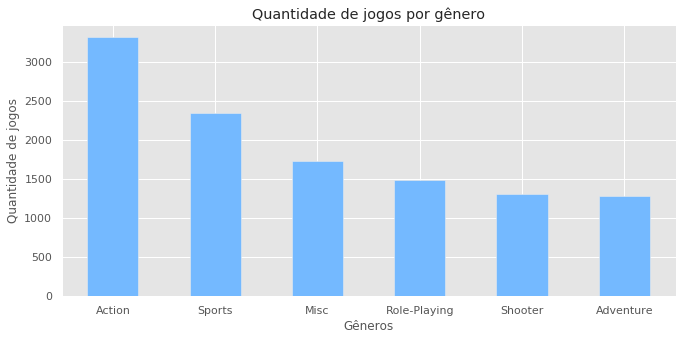

In [96]:
listGames['Gênero'].value_counts().head(6).plot(kind='bar', 
                                                figsize=(11,5), 
                                                grid=True, 
                                                rot=0, 
                                                color=['#74b9ff'])
plot.xlabel("Gêneros")
plot.ylabel("Quantidade de jogos")
plot.title("Quantidade de jogos por gênero")
plot.show()

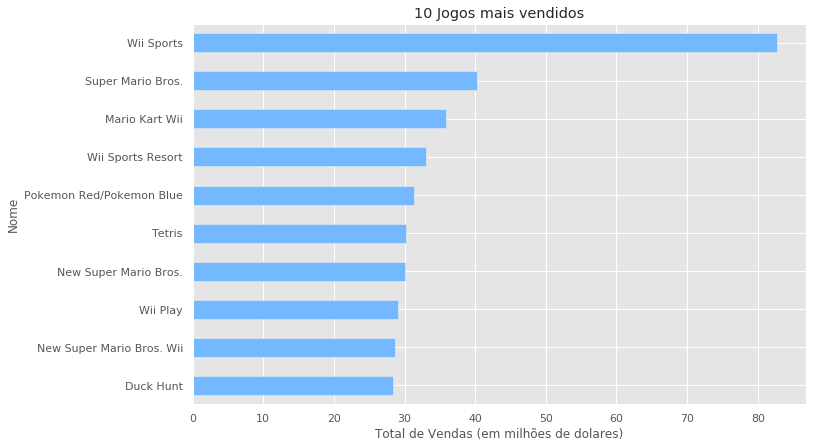

In [97]:
top_10_vendidos = listGames[['Nome', 'Vendas Global']]
top_10_vendidos = top_10_vendidos.head(10).set_index('Nome').sort_values('Vendas Global', ascending=True)

top_10_vendidos.plot(kind='barh', figsize=(11,7), color='#74b9ff', legend=False)
plot.title("10 Jogos mais vendidos")
plot.xlabel("Total de Vendas (em milhões de dolares)")
plot.show()

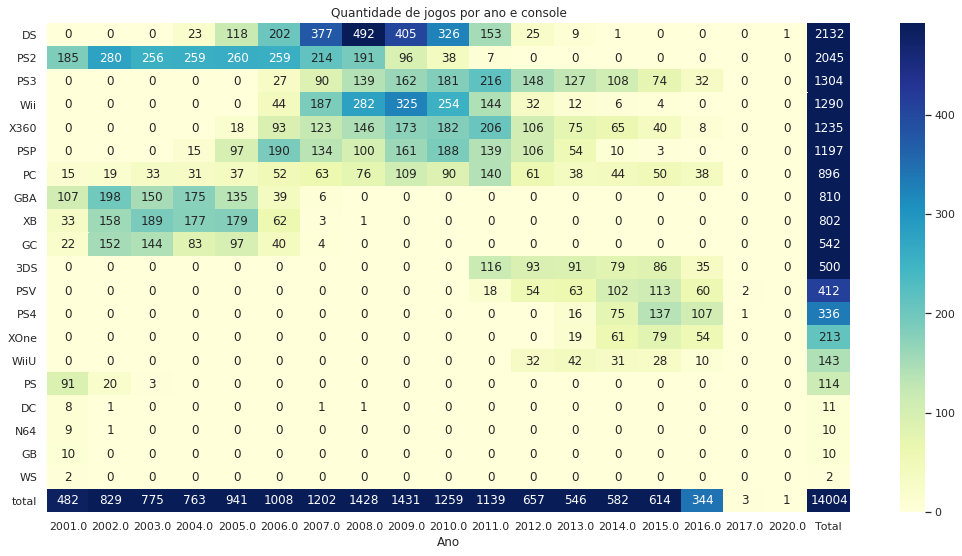

In [149]:
crosstab = pandas.crosstab(listGames['Plataforma'], listGames[listGames['Ano'] > 2000]['Ano'])
crosstab['Total'] = crosstab.sum(axis=1)

top_plataforma = crosstab.sort_values('Total', ascending=False)

top_final = top_plataforma.append(pandas.DataFrame(top_plataforma.sum(), columns=['total']).T, ignore_index=False)

top_final
seaborn.set(font_scale=1)
plot.figure(figsize=(18,9))

seaborn.heatmap(top_final, annot=True, 
            vmax=top_final.iloc[0:12, 0:8].values.max(), 
           vmin=top_final.iloc[0:12, 0:8].values.min(), fmt='d', cmap="YlGnBu")
plot.title("Quantidade de jogos por ano e console")
plot.show()
